# There are multiple objectives of this program. 
# We will be reading the data from ETTh1.csv file which consists of various electricity loading features and oil tempratures. 
# Using this data, we would like to save electrical transformers getting damaged due to electricity overloading.

In [1]:
# Importing all the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Libraries imported!!!")

Libraries imported!!!


# Q1. Load the data from supplied data file. Remove the observations/samples where the oil temperature is less than 4. 
# Print the data dimension before and after removing the observations/samples. 

In [2]:
# Loading the csv data into a data frame object using read_csv function. 
# The csv data file is in the same directory where this python program file is saved.
data = pd.read_csv("ETTh1.csv")
data.shape

(17420, 8)

In [3]:
# Removing the observations/sample where the oil temprature is less than 4.
data.drop(data[data['OT']<4].index,inplace=True)
data.shape

(15699, 8)

### <span style="color:blue"> Observation: No. of rows have reduced by 1721 (17420 - 15699) without any change in no. of features. inplace parameter is used to drop the data from the same dataframe.</span>

# Q2. Load the data from supplied data file. 
# Display the number of rows and their indices that have missing value in one or more cells. 
# Now, replace the missing values by the lowest value of the corresponding feature only if the data type is numeric. 
# Print the mean values of all features before and after replacing missing data and explain the reason if they are not same.

In [4]:
# Loading the data from csv file once again.
data = pd.read_csv("ETTh1.csv")
# Display no of rows and their indices with missing values.
count_rows_missing_values = data.isnull().any(axis=1).sum()
print("No. of rows with missing values:", count_rows_missing_values,"\n")
print("Rows indices with missing values:\n",data.loc[data.isnull().any(axis=1)])
print("Feature wise missing values:\n",data.isnull().sum(),"\n")

missing_values_list = data[data.isnull().any(axis=1)].index.tolist()
print("Indices with missing values:", missing_values_list,"\n")

# Printing the mean values of all features before replacement
data_mean_before_replace = data.mean(axis=0,skipna=True,level=None, numeric_only=True)
print("Mean of all numeric features (before min. value has been imputed): \n",data_mean_before_replace,"\n")

# Find minimum value for each numeric column and print it
data_min = data.min(axis=0,skipna=True,level=None, numeric_only=True)
print("Minimum value for each numeric feature:\n",data_min)

#Fill all blank cells with minimum value
data.fillna(value=data_min,inplace=True)

data_mean_after_replace = data.mean(axis=0,skipna=True,level=None, numeric_only=True)
print("\nMean of all numeric features (after min. value has been imputed): \n",data_mean_after_replace,"\n")

data.head()

No. of rows with missing values: 7 

Rows indices with missing values:
                  date       HUFL   HULL    MUFL   MULL   LUFL   LULL      OT
4261    23/06/18 0:00  16.476999  6.765  12.117  4.335    NaN  1.249   5.346
14971             NaN   1.541000  3.014  -0.675  0.888  2.498  1.218   4.643
17301  21/06/18 21:00   8.172000  2.009     NaN  0.497  3.046  1.127   8.371
17346  23/06/18 18:00   6.631000    NaN   3.731  1.279  2.833  1.127   8.301
17372  24/06/18 20:00   8.239000  2.344     NaN  0.995  2.802  0.944   8.864
17384             NaN   3.684000  5.090  -1.457  3.198  5.239  1.919  10.974
17416  26/06/18 16:00  -5.492000  4.287  -9.132  2.274    NaN  1.675  11.044
Feature wise missing values:
 date    2
HUFL    0
HULL    1
MUFL    2
MULL    0
LUFL    2
LULL    0
OT      0
dtype: int64 

Indices with missing values: [4261, 14971, 17301, 17346, 17372, 17384, 17416] 

Mean of all numeric features (before min. value has been imputed): 
 HUFL     7.375141
HULL     2.242217
MU

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,01/07/16 0:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,01/07/16 1:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,01/07/16 2:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,01/07/16 3:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,01/07/16 4:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


### <span style="color:blue"> Observation: The reason why the new mean for HULL, MUFL, and LUFL is not same (or changed) because of minimum value that have been imputed in the blank cells and new mean has been calculated once again. For other features, there is no change in the mean.</span>

# Q3. Continue from question 2. Find the date where oil temperature is more than 20 and display those observations.

In [5]:
data_date_OTG20 = data.loc[data['OT'] > 20]
print("Date where oil temperature is more than 20:\n",data_date_OTG20,"\n")
data_date_OTG20_count = data.loc[data['OT'] > 20,'date'].count()
print("No. of records where oil temperature is more than 20: ",data_date_OTG20_count)

Date where oil temperature is more than 20:
                  date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0       01/07/16 0:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1       01/07/16 1:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2       01/07/16 2:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3       01/07/16 3:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4       01/07/16 4:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000
...               ...    ...    ...    ...    ...    ...    ...        ...
10144  27/08/17 16:00 -1.072  4.823 -4.868  3.376  3.533  1.157  20.049000
10166  28/08/17 14:00 -2.880  6.229 -7.960  5.366  4.386  1.279  20.118999
10167  28/08/17 15:00 -3.215  6.966 -7.569  5.010  4.599  1.218  20.541000
10168  28/08/17 16:00  0.000  5.023 -4.051  3.376  4.051  1.432  21.597000
10169  28/08/17 17:00  5.358  3.818  1.208  2.452  4.295  1.401  22.230000

[3361 rows x 8 columns] 

No. of records where oil tem

# Q4: Continue from question 3. Which feature(s) having the strongest influence on oil temperature?

In [6]:
# We will establish correlation between each independent variable and the dependent variable (OT)
corr1 = data_date_OTG20['HUFL'].corr(data_date_OTG20['OT'])
print("Correlation between HUFL and OT is:",corr1)
corr2 = data_date_OTG20['HULL'].corr(data_date_OTG20['OT'])
print("Correlation between HULL and OT is:",corr2)
corr3 = data_date_OTG20['MUFL'].corr(data_date_OTG20['OT'])
print("Correlation between MUFL and OT is:",corr3)
corr4 = data_date_OTG20['MULL'].corr(data_date_OTG20['OT'])
print("Correlation between MULL and OT is:",corr4)
corr5 = data_date_OTG20['LUFL'].corr(data_date_OTG20['OT'])
print("Correlation between LUFL and OT is:",corr5)
corr6 = data_date_OTG20['LULL'].corr(data_date_OTG20['OT'])
print("Correlation between LULL and OT is:",corr6)

Correlation between HUFL and OT is: 0.44245642038127747
Correlation between HULL and OT is: 0.24952016573075259
Correlation between MUFL and OT is: 0.3928210508442878
Correlation between MULL and OT is: 0.041541137891684385
Correlation between LUFL and OT is: 0.1533929011442238
Correlation between LULL and OT is: 0.4311198208002573


In [7]:
# Another way to visualize the correlation matrix. 
# By looking at OT column below, one identify the variables which have the strongest influence on OT.
corr = data_date_OTG20.corr()

corr.style.background_gradient(cmap='coolwarm')

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
HUFL,1.000000,0.280741,0.976711,0.092894,0.251710,0.310260,0.442456
HULL,0.280741,1.000000,0.251586,0.886920,0.008168,0.562265,0.249520
MUFL,0.976711,0.251586,1.000000,0.111921,0.167363,0.226550,0.392821
MULL,0.092894,0.886920,0.111921,1.000000,-0.122833,0.183503,0.041541
LUFL,0.251710,0.008168,0.167363,-0.122833,1.000000,0.131676,0.153393
LULL,0.310260,0.562265,0.226550,0.183503,0.131676,1.000000,0.431120
OT,0.442456,0.249520,0.392821,0.041541,0.153393,0.431120,1.000000


### <span style="color:blue">Observation: According to the above values, HUFL and LULL have the strongest influence on oil temperature. </span> 
### <span style="color:blue">Infact, HUFL has slightly more influence than LULL.</span>

# Q5: Load the data from supplied data file. Print the average value of all numeric features where oil temperature is less than 7 and greater than 4.

In [8]:
# Loading the data from csv file once again.
data = pd.read_csv("ETTh1.csv")

# Calculating the mean for each numeric column
data_mean = data.loc[(data['OT'] > 4) & (data['OT'] < 7)].mean(axis=0,skipna=True,level=None, numeric_only=True)
print("Mean value for each numeric feature:\n",data_mean)

Mean value for each numeric feature:
 HUFL    8.213497
HULL    1.939812
MUFL    5.012280
MULL    0.511695
LUFL    3.137453
LULL    0.903909
OT      5.537617
dtype: float64


# Q6. Display the number of observations that satisfies following conditions:

In [9]:
# a. OT value is within the range between 10 and 25
Count1 = data.loc[((data['OT'] >= 10) & (data['OT'] <= 25)),'OT'].count()
print("No. of observations where OT value is within the range between 10 and 25:\t",Count1)

No. of observations where OT value is within the range between 10 and 25:	 8482


In [10]:
# b. HUFL is positive
Count2 = data.loc[(data['HUFL'] > 0),'HUFL'].count()
print("No. of observations where HUFL is positive:\t",Count2)

No. of observations where HUFL is positive:	 15013


In [40]:
# c. 4<MUFL<11
Count3 = data.loc[((data['MUFL'] > 4) & (data['MUFL'] < 11)),'MUFL'].count()
print("No. of observations where MUFL is between 4 (exclusive) and 11 (exclusive):\t",Count3)

No. of observations where MUFL is between 4 (exclusive) and 11 (exclusive):	 11091


In [48]:
# Combining all the above conditions
TotalCount = len(data[((data['MUFL'] > 4) & (data['MUFL'] < 11) & 
                      (data['OT'] >= 10) & (data['OT'] <= 25) & 
                      (data['HUFL'] > 0))])
print("No. of observations:\t",TotalCount)


No. of observations:	 4795


# Q7. Print the average of HULL for observations, which has OT value between -5 and 10. Is this higher than HULL average calculated using the complete dataset?

In [28]:
# HULL Average on the complete dataset
Avg_HULL = data['HULL'].mean()
print("HULL Average on the complete dataset:\t\t\t",Avg_HULL)

# HULL Average where OT value is between -5 and 10.
Avg_HULL_1 = data.loc[((data['OT'] >= -5) & (data['OT'] <= 10)),'HULL'].mean()
print("HULL Average where OT value is between -5 and 10:\t",Avg_HULL_1)

HULL Average on the complete dataset:			 2.241847773912849
HULL Average where OT value is between -5 and 10:	 2.0796321867250165


### <span style="color:blue"> Observation: HULL Average on the complete dataset is greater than HULL Average where OT value is between -5 and 10. </span>

# Q8. Create and print data frame where OT values are in the range from 1 to 40 with an interval of 5.  (Ex. 1-5, 6-10..., 36-40).

In [13]:
# Printing the count for each bucket without creating a new data frame. This is required just for validation.

print("(1, 6]:\t\t",data.loc[((data['OT'] > 1) & (data['OT'] <= 6)),'OT'].count())
print("(6, 11]:\t",data.loc[((data['OT'] > 6) & (data['OT'] <= 11)),'OT'].count())
print("(11, 16]:\t",data.loc[((data['OT'] > 11) & (data['OT'] <= 16)),'OT'].count())
print("(16, 21]:\t",data.loc[((data['OT'] > 16) & (data['OT'] <= 21)),'OT'].count())
print("(21, 26]:\t",data.loc[((data['OT'] > 21) & (data['OT'] <= 26)),'OT'].count())
print("(26, 31]:\t",data.loc[((data['OT'] > 26) & (data['OT'] <= 31)),'OT'].count())
print("(31, 36]:\t",data.loc[((data['OT'] > 31) & (data['OT'] <= 36)),'OT'].count())
print("(36, 41]:\t",data.loc[((data['OT'] > 36) & (data['OT'] <= 41)),'OT'].count())

(1, 6]:		 3135
(6, 11]:	 4900
(11, 16]:	 3422
(16, 21]:	 2736
(21, 26]:	 1375
(26, 31]:	 569
(31, 36]:	 577
(36, 41]:	 297


In [14]:
# I am going to bin the OT values using 2 different approaches here. 
# First is by creating using range and bucket list method and second is interval_range method.
# After that, I will apply the cut method.

In [15]:
# Creating a range 
bucket_range_list = [1.0,6.0,11.0,16.0,21.0,26.0,31.0,36.0,41.0]
data_column = data['OT']
bucket_label = ["(1, 6]:","(6-11]:","(11-16]:","(16-21]:","(21-26]:","(26-31]:","(31-36]:","(36-40]:"]
data_bucket_range = pd.cut(data_column, bucket_range_list, labels=bucket_label).value_counts()
data_bucket_range = data_bucket_range.to_frame().reset_index()
data_bucket_range = data_bucket_range.rename(columns={'index': 'Bucket', 'OT': 'Count'})
print(data_bucket_range)
print("Total Count:\t",data_bucket_range['Count'].sum())

     Bucket  Count
0   (6-11]:   4900
1  (11-16]:   3422
2   (1, 6]:   3135
3  (16-21]:   2736
4  (21-26]:   1375
5  (31-36]:    577
6  (26-31]:    569
7  (36-40]:    297
Total Count:	 17011


In [16]:
# Creating bins using interval_range method
bins = pd.interval_range(start=1,periods=8, freq=5,closed='right')
print(bins)
data_bucket_interval = pd.cut(data['OT'], bins).value_counts().sort_index()
data_bucket_interval = data_bucket_interval.to_frame().reset_index()
data_bucket_interval = data_bucket_interval.rename(columns={'index': 'Bucket', 'OT': 'Count'})

print(data_bucket_interval)
print("Total Count:\t",data_bucket_interval['Count'].sum())

IntervalIndex([(1, 6], (6, 11], (11, 16], (16, 21], (21, 26], (26, 31], (31, 36], (36, 41]], dtype='interval[int64, right]')
     Bucket  Count
0    (1, 6]   3135
1   (6, 11]   4900
2  (11, 16]   3422
3  (16, 21]   2736
4  (21, 26]   1375
5  (26, 31]    569
6  (31, 36]    577
7  (36, 41]    297
Total Count:	 17011


### <span style="color:blue"> Observation: In both the approaches the bin range Total Count is same.</span>

# Q9. Continue from question 8. For each group, display the minimum and maximum of all the features except Date and OT.

In [17]:
# Creating bins using interval_range method
bins = pd.interval_range(start=1,periods=8, freq=5,closed='right')
# labels = {"(1,6]","(6,11]","(11,16]","(16,21]","(21,26]","(26,31]","(31,36]","(36,41]"}
print(bins)

data_copy = data.copy() # Copy the original data frame in the new data frame
data_copy['Bucket'] = pd.cut(data_copy['OT'], bins)

data_bucket_interval = pd.cut(data_copy['OT'], bins).value_counts().sort_index()
data_bucket_interval = data_bucket_interval.to_frame().reset_index()
data_bucket_interval = data_bucket_interval.rename(columns={'index': 'Bucket', 'OT': 'Count'})

IntervalIndex([(1, 6], (6, 11], (11, 16], (16, 21], (21, 26], (26, 31], (31, 36], (36, 41]], dtype='interval[int64, right]')


In [18]:
# Create a list of all 12 columns that need to be added in the data_bucket_interval, one each for max and min.
index2 = 1
temp1 = []    
for index2 in range(6):
    temp1.append(data_copy.columns[index2+1]+"_Max")
    temp1.append(data_copy.columns[index2+1]+"_Min")

temp_max_index = len(temp1)

# keep adding columns upto the last index in temp_index
for temp_index in range(temp_max_index):
     data_bucket_interval[temp1[temp_index]] = ''

# Another list for getting all the floating columns in the original dataframe from index 1 to 7
temp2 = list(data_copy.columns[1:7])

index = data_bucket_interval.index
i,j,k = 0,1,6
for i in index:
    
    l, m = 0, 0
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].max()
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].min()
    
    l += 1
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].max()
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].min()
    
    l += 1 
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].max()
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].min()
    
    l += 1
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].max()
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].min()
    
    l += 1
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].max()
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].min()
    
    l += 1
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].max()
    m += 1
    data_bucket_interval.at[i,temp1[m]]= data_copy[temp2[l]].loc[((data_copy['OT'] > j) & (data_copy['OT'] <= k))].min()
    
    
    i = i + 1
    j = j + 5
    k = k + 5
    
data_bucket_interval 

,Bucket,Count,HUFL_Max,HUFL_Min,HULL_Max,HULL_Min,MUFL_Max,MUFL_Min,MULL_Max,MULL_Min,LUFL_Max,LUFL_Min,LULL_Max,LULL_Min
0,"(1, 6]",3135,20.830999,-19.424,10.047,-2.947,15.813,-21.783001,7.747,-3.909,6.945,0.0,2.224,-1.188
1,"(6, 11]",4900,18.888,-22.705999,7.837,-4.756,14.107,-25.087999,5.899,-5.934,6.366,0.0,2.498,-1.371
2,"(11, 16]",3422,17.615999,-20.362,8.707,-4.421,13.432,-22.885,6.894,-5.934,6.488,-1.188,2.711,-1.371
3,"(16, 21]",2736,22.438,-18.754,10.114,-3.684,16.097,-21.285,7.569,-3.34,8.285,0.67,2.498,-1.371
4,"(21, 26]",1375,22.639,-15.271,7.502,-2.679,16.773001,-18.372,5.863,-2.416,8.498,0.64,2.224,-1.036
5,"(26, 31]",569,20.898001,-0.737,8.841,-0.402,14.392,-6.254,5.579,-2.097,7.219,1.127,3.046,0.305
6,"(31, 36]",577,23.643999,2.277,8.573,0.268,17.341,0.0,5.33,-1.031,7.523,1.553,2.254,0.67
7,"(36, 41]",297,21.568001,5.961,7.1,-0.402,16.417,2.559,4.904,-2.168,7.889,1.888,2.132,0.731


# Q10. Create data frames containing observations recorded in the date range either between January and June or between July and December for individual year (ex: 2016, 2017..etc). This means there will be two data frames for each year as long as there is one observation that falls in either January-June or July-December date range. Store the data frames in separate CSV file named ‘year_monthStart_monthEnd.csv’ in the same directory of your code file, where value of ‘month_Start’ is either January or July and value of ‘monthEnd’ is either June or December based on the date range of the corresponding data frame.

In [19]:
# We will add 2 more columns in data_copy dataframe, one for Month Range and another one for Year. 
# Before that we will drop the rows whereever date is blank

data_copy = data_copy.dropna(axis=0,subset=['date'])
data_copy['Year'] = pd.DatetimeIndex(data_copy['date']).year

# We will first convert date column to datetime datatype column 
data_copy['date'] = pd.to_datetime(data_copy['date'],format='%d/%m/%y %H:%M')
# and then get the month name, month_range and Year_Start_End as per Month_Range and Year.
data_copy['Month'] = data_copy['date'].dt.month_name()
data_copy['Month_Range'] = data_copy['Month'].apply(lambda x: 'Jan_Jun' if (x in [ 'January','February','March','April','May','June']) else 'Jul_Dec')    
data_copy['Year_Start_End'] = data_copy['Year'].astype(str) + '_' + data_copy['Month_Range']
print(data_copy.shape)

# Get the list of unique Year_Start_End
Year_Start_End = data_copy.Year_Start_End.unique()

# For each element in Year_Start_End, create a CSV file and columns to be exported.
for x in Year_Start_End:
    Year_Start_End = data_copy.loc[(data_copy['Year_Start_End'] == x)].copy()
    filename = x + ".csv"
    Year_Start_End.to_csv(filename,columns=['date','HUFL','HULL','MUFL','MULL','LUFL','LULL','OT'])
    print(Year_Start_End.shape)
    print(filename + ' exported successfully!!!')

(17418, 13)
(4416, 13)
2016_Jul_Dec.csv exported successfully!!!
(4242, 13)
2018_Jan_Jun.csv exported successfully!!!
(4416, 13)
2017_Jul_Dec.csv exported successfully!!!
(4344, 13)
2017_Jan_Jun.csv exported successfully!!!


# Q11. Visualise variations of OT values with respect to other features (one at a time) except ‘date’. Explain your findings briefly.

0.08046939956268997 12.914885676696027


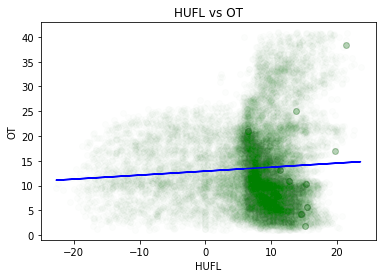

1.0000000000000018 -2.179589198454534e-16


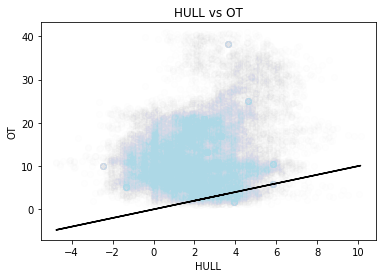

0.07349256181406665 13.190819431975141


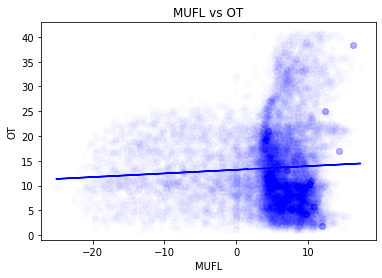

1.088131105331302 12.542434445606084


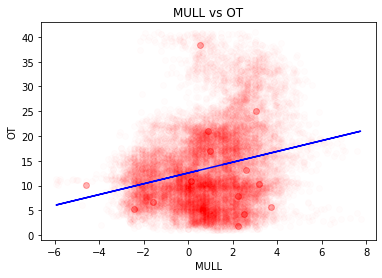

0.8360797542889881 10.946077390218528


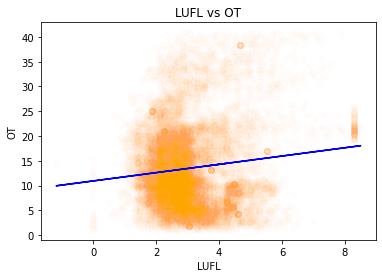

0.6728116028806329 12.92333410402635


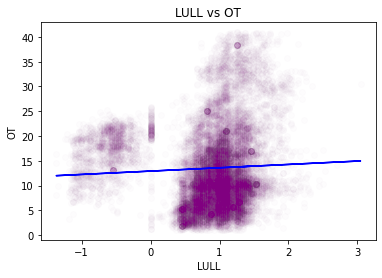

In [20]:
# Dropping rows whereever there is an empty cell.
data_copy.dropna(inplace = True)

plt.scatter(data_copy['HUFL'], data_copy['OT'], alpha=0.01,color='green',edgecolors='face')
m, b = np.polyfit(data_copy['HUFL'], data_copy['OT'], 1)
plt.plot(data_copy['HUFL'], m*data_copy['HUFL']+b, color='blue')
print(m, b)
plt.xlabel('HUFL')
plt.ylabel('OT')
plt.title('HUFL vs OT')
plt.show()


plt.scatter(data_copy['HULL'], data_copy['OT'], alpha=0.01,color='lightblue',edgecolors='face')
m, b = np.polyfit(data_copy['HULL'], data_copy['HULL'], 1)
plt.plot(data_copy['HULL'], m*data_copy['HULL']+b, color='black')
print(m, b)
plt.xlabel('HULL')
plt.ylabel('OT')
plt.title('HULL vs OT')
plt.show()


plt.scatter(data_copy['MUFL'], data_copy['OT'], alpha=0.01,color='blue',edgecolors='face')
m, b = np.polyfit(data_copy['MUFL'], data_copy['OT'], 1)
plt.plot(data_copy['MUFL'], m*data_copy['MUFL']+b, color='blue')
print(m, b)
plt.xlabel('MUFL')
plt.ylabel('OT')
plt.title('MUFL vs OT')
plt.show()

plt.scatter(data_copy['MULL'], data_copy['OT'], alpha=0.01,color='red',edgecolors='face')
m, b = np.polyfit(data_copy['MULL'], data_copy['OT'], 1)
plt.plot(data_copy['MULL'], m*data_copy['MULL']+b, color='blue')
print(m, b)
plt.xlabel('MULL')
plt.ylabel('OT')
plt.title('MULL vs OT')
plt.show()

plt.scatter(data_copy['LUFL'], data_copy['OT'], alpha=0.01,color='orange',edgecolors='face')
m, b = np.polyfit(data_copy['LUFL'], data_copy['OT'], 1)
plt.plot(data_copy['LUFL'], m*data_copy['LUFL']+b, color='blue')
print(m, b)
plt.xlabel('LUFL')
plt.ylabel('OT')
plt.title('LUFL vs OT')
plt.show()

plt.scatter(data_copy['LULL'], data_copy['OT'], alpha=0.01,color='purple',edgecolors='face')
m, b = np.polyfit(data_copy['LULL'], data_copy['OT'], 1)
plt.plot(data_copy['LULL'], m*data_copy['LULL']+b, color='blue')
print(m, b)
plt.xlabel('LULL')
plt.ylabel('OT')
plt.title('LULL vs OT')
plt.show()

## <span style="color:blue"> Observations:</span>

### I have used a scatter function to compare OT with individual features and added a regression line in each graph. I have also used an alpha parameter = 0.01 to make the data points transparent to find out the peaks.

### <span style="color:blue"> 1. HUFL vs OT: </span>
#### a. Since the slope of the line is close to 0 (~+0.08), we are getting almost a flat line (or a marginal rise). The y-intercept is ~+12.91. In all likelihood, we should not get extreme values of OT values.
#### b. Most of the data points are concentrated between 5 to 15 HUFL values 
#### c. If HUFL values (independent variable) are between 6.72 and 20, we should get most of the OT values between 0 and 20. 
#### d. There are peaks on both sides of the line.

### <span style="color:blue"> 2. HULL vs OT: </span>
#### a. Since the slope of the line is greater than 1, we can see the line is rising. The y-intercept is ~-2.12. In all likelihood, we should not get extreme values of OT values.
#### b. Most of the data points are concentrated between -2 to 6 HULL values. If HULL values (independent varibale) are between -2 and 6, we should get most of the OT values between 0 and 20. 
#### d. There are very few peaks above the line. Most of the data points are concentrated above the line.

### <span style="color:blue"> 3. MUFL vs OT: </span>
#### a. The graph is similar to HUFL and OT.

### <span style="color:blue"> 4. MULL vs OT: </span>
#### a. The graph is similar to HULL and OT except there are peaks on both sides of the line.

### <span style="color:blue"> 5. LUFL vs OT: </span>
#### a. The graph is also rising but not that much as compared to HUFL vs OT and MUFL vs OT.
#### b. There are peak points on both side of the line. 
#### c. There data points on both sides of the line with another sub-set (or outlier) on the right hand side just above the line.

### <span style="color:blue"> 6. LULL vs OT: </span>
#### a. The graph is also almost flat. 
#### b. Most of the peaks are above the line.
#### c. There data points on both sides of the line. Interestingly, we can also see another group of points if LULL < 0

# Q12. Draw a pie chart summarising number of observations per year.

In [21]:
# First we will create a dataframe with year wise total number of observations and their % age distribution wrt total
Data_YearWise_Count = data_copy.groupby(['Year'])['Year'].count().reset_index(name='Count')
Data_YearWise_Count['%age'] = round(Data_YearWise_Count['Count'] / Data_YearWise_Count['Count'].sum() * 100,1)
Data_YearWise_Count

,Year,Count,%age
0,2016,4315,25.4
1,2017,8735,51.4
2,2018,3954,23.3


<AxesSubplot:ylabel='Year'>

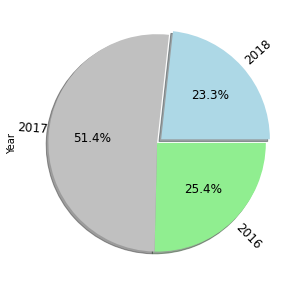

In [22]:
colors = ['lightgreen', 'silver', 'lightblue']
Year = Data_YearWise_Count.Year.unique()
explode = (0.0, 0.0, 0.05)

data_copy.groupby(['Year'])['Year'].count().plot.pie(y='Year',figsize=(6,5),fontsize=12, shadow=True, labels = Year, labeldistance = 1, 
                             colors=colors, explode=explode,rotatelabels='true',counterclock=False,autopct='%1.1f%%')

## Observation: The highest number of observations were recorded in year 2017 which is at 50.3%, followed by year 2016 at 25.4% and then in 2018 at 24.4%

# Q13. Create histogram of OT values and explain the graph.

Text(0.5, 1.0, 'OT Distribution')

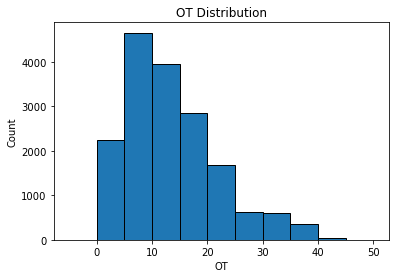

In [23]:
# importing matplotlib for plotting histogram
from matplotlib import pyplot as plt

#Plotting a histogram of OT values
plt.hist(data_copy['OT'],bins=range(-5,55,5),edgecolor='Black')
plt.xlabel('OT')
plt.ylabel('Count')
plt.title('OT Distribution')

### <span style="color:blue"> Observation: Maximum observations of OT values are reported between 5 and 10, followed by 10 and 15, and then 15 and 20. Least number of observations are reported between 45 and 50.</span>

# Q14. Load the data from supplied data file. Add three more columns titled [‘HUFL_HULL’, ‘MUFL_MULL’’,’ LUFL_LULL’’] where, HUFL_HULL = (HUFL + HULL) / 2, MUFL_MULL = (MUFL + MULL) / 2, and LUFL_LULL = (LUFL + LULL) / 2. Save the updated data frame to a csv file named ‘Average_data.csv’ in the same directory of your code file.

In [24]:
# Loading Data from CSV file.
data = pd.read_csv("ETTh1.csv")
# Calculating averages and storing them in new columns
data['HUFL_HULL'] = (data['HUFL'] + data['HULL'])/2
data['MUFL_MULL'] = (data['MUFL'] + data['MULL'])/2
data['LUFL_LULL'] = (data['LUFL'] + data['LULL'])/2
# Exporting the data frame to Average.csv file
data.to_csv('Average.csv')
print("File exported successfully!!!")

File exported successfully!!!


# Q15. Continue from question 14. Drop the row where any of the newly added features value is null. Finally, display the filtered observations and save to a csv file named ‘Average_clean_data.csv’ in the same directory of your code file.

In [25]:
# Display no of rows and their indices with missing values.
count_rows_missing_values = data.isnull().any(axis=1).sum()
print("No. of rows with missing values:", count_rows_missing_values,"\n")
print("Feature wise missing values:\n",data.isnull().sum(),"\n")

No. of rows with missing values: 7 

Feature wise missing values:
 date         2
HUFL         0
HULL         1
MUFL         2
MULL         0
LUFL         2
LULL         0
OT           0
HUFL_HULL    1
MUFL_MULL    2
LUFL_LULL    2
dtype: int64 



In [26]:
# Dropping rows where the below features are blank
data.dropna(axis=0,subset = ['HUFL_HULL','MUFL_MULL','LUFL_LULL'],inplace=True)
# Exporting the data frame to Average_clean_data.csv file
data.to_csv('Average_clean_data.csv')
print("File exported successfully!!!")

File exported successfully!!!


### <span style="color:blue"> Observation: No. of rows decrease from 17420 to 17415. </span>